# 📃 Solution for Exercise M5.02

The aim of this exercise is to find out whether a decision tree
model is able to extrapolate.

By extrapolation, we refer to values predicted by a model outside of the
range of feature values seen during the training.

We will first load the regression data.

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_regression.csv")

feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data_train, target_train = penguins[[feature_name]], penguins[target_name]

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

First, create two models, a linear regression model and a decision tree
regression model, and fit them on the training data. Limit the depth at
3 levels for the decision tree.

In [2]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

linear_regression = LinearRegression()
tree = DecisionTreeRegressor(max_depth=3)

linear_regression.fit(data_train, target_train)
tree.fit(data_train, target_train)

DecisionTreeRegressor(max_depth=3)

Create a synthetic dataset containing all possible flipper length from
the minimum to the maximum of the training dataset. Get the predictions of
each model using this dataset.

In [3]:
# solution
import numpy as np

data_test = pd.DataFrame(np.arange(data_train[feature_name].min(),
                                   data_train[feature_name].max()),
                         columns=[feature_name])

In [4]:
target_predicted_linear_regression = linear_regression.predict(data_test)
target_predicted_tree = tree.predict(data_test)

Create a scatter plot containing the training samples and superimpose the
predictions of both models on the top.

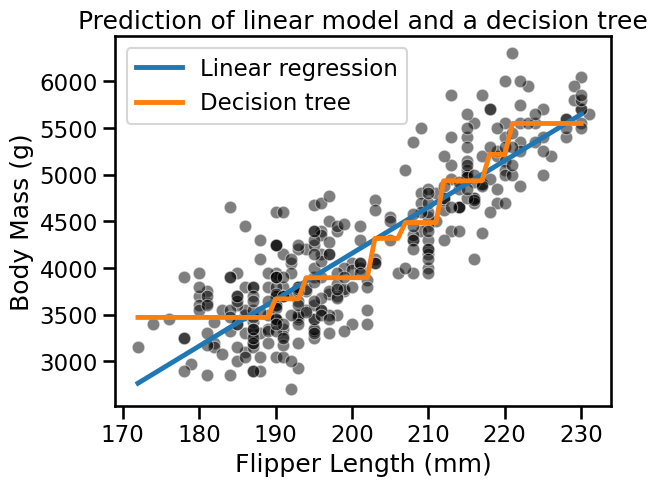

In [5]:
# solution
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted_linear_regression,
         label="Linear regression")
plt.plot(data_test[feature_name], target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

The predictions that we got were within the range of feature values seen
during training. In some sense, we observe the capabilities of our model to
interpolate.

Now, we will check the extrapolation capabilities of each model. Create a
dataset containing a broader range of values than your previous dataset,
in other words, add values below and above the minimum and the maximum of
the flipper length seen during training.

In [6]:
# solution
offset = 30
data_test = pd.DataFrame(np.arange(data_train[feature_name].min() - offset,
                                   data_train[feature_name].max() + offset),
                         columns=[feature_name])

Finally, make predictions with both models on this new interval of data.
Repeat the plotting of the previous exercise.

In [7]:
# solution
target_predicted_linear_regression = linear_regression.predict(data_test)
target_predicted_tree = tree.predict(data_test)

In [10]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(target_predicted_tree, target_predicted_linear_regression )
print(f"The MSE is {error}")

The MSE is 862565.9756763445


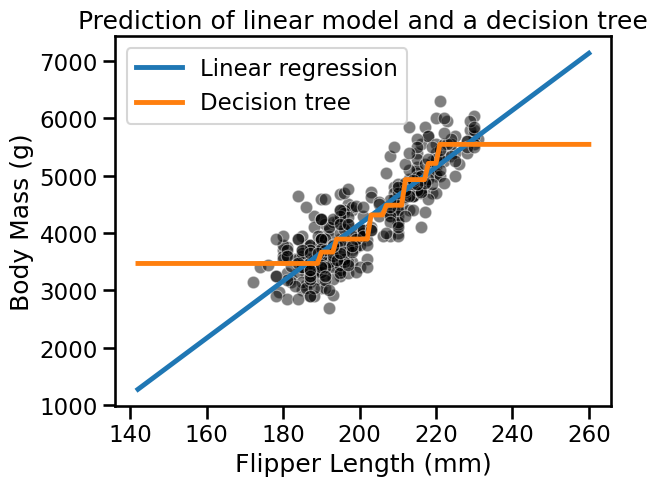

In [9]:
sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                color="black", alpha=0.5)
plt.plot(data_test[feature_name], target_predicted_linear_regression,
         label="Linear regression")
plt.plot(data_test[feature_name], target_predicted_tree, label="Decision tree")
plt.legend()
_ = plt.title("Prediction of linear model and a decision tree")

The linear model will extrapolate using the fitted model for flipper lengths
< 175 mm and > 235 mm. In fact, we are using the model parametrization to
make this predictions.

As mentioned, decision trees are non-parametric models and we observe that
they cannot extrapolate. For flipper lengths below the minimum, the mass of
the penguin in the training data with the shortest flipper length will always
be predicted. Similarly, for flipper lengths above the maximum, the mass of
the penguin in the training data with the longest flipper will always be
predicted.